In [52]:
from sklearn.datasets import fetch_mldata
#importation pour l'échantillonage
import numpy as np
import matplotlib.pyplot as plt
#Importation pour spliter les données
from sklearn.cross_validation import train_test_split
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [53]:
mnist = fetch_mldata('MNIST original',data_home='./scikit_learn_data') #chercher le dossier MNIST

In [54]:
print (mnist.data.shape) #affiche 70 000 image de 28*28pixels =784 données)

(70000, 784)


In [55]:
mnist.target.shape #annotation au dessus de l'image de 28*28

(70000,)

In [56]:
num_samples=5000 #on prend 5000 données sur les 70000
sample= np.random.randint(mnist.data.shape[0],size=num_samples) #data shape [0] renvoi 70000, cad le nombre d'observation
X = mnist.data [sample] #on récupère les images
Y = mnist.target [sample] #on récupères le target

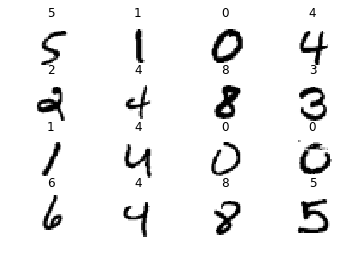

In [57]:
#affichier des images et afficher le dataset
#ETAPE1, on redimensionne en 28*28 les vecteurs qui sont en un seul vecteur
sample_viz= X.reshape((-1,28,28)) 
for index, val in enumerate (np.random.randint(num_samples,size=16)):#création d'une boucle sur l'échantillon
    plt.subplot(4,4,index+1) #afficher des carrés de taille 4
    #puis en sautant un ligne au bout du 5ième carré (index+1 pour ne pas afficher un vide au début)
    plt.axis('off') #supprime les axes X et Y 
    plt.imshow(sample_viz[val],cmap=plt.cm.gray_r, interpolation="nearest") 
    #afficher les résultats de la boucles, en noir et blanc 
    #(_r permet d'inverser noir et blanc), on affiche des pixel, pas besoin de faire des interpolations
    #---------------------------------------
    plt.title ('%i'% Y[val]) #permet d'afficher les targets

plt.show() #afficher les images que l'on a crée

In [58]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, train_size=0.7)
#on split en training et testing les données
#la fonction découpe le dataset dans les proportions souhaitées
#le dataset renvoi les quatre matrices

In [59]:
knn = KNeighborsClassifier(3) #NB de voisin = 3 

In [60]:
knn.fit(Xtrain,Ytrain) #on entraine le classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [61]:
print (knn.predict(Xtrain[10:15])) #prend les images dont le numéro est entre 10 et 15
print (Ytrain[10:15]) #prend les targets compris entre 10 et 15

[2. 9. 6. 2. 2.]
[2. 9. 6. 2. 7.]


In [62]:
knn.score(Xtest,Ytest)*100  #affiche en % le taux de réussite (attention ce résultat dépend des 5000 données )

92.60000000000001

In [63]:
(1-knn.score(Xtest,Ytest))*100 #affiche en % le taux d'échec

7.399999999999995

In [64]:
#on va tester différents classifier
krange= range(2,15) #2 à 15 voisins
errors=[] #création du tableau erreurs
for k in krange:
    knn = KNeighborsClassifier(k)
    knn.fit(Xtrain,Ytrain)
    errors.append(1-knn.score(Xtest,Ytest)) #mesure des erreurs et les mets dans un tableaux

<function matplotlib.pyplot.show(*args, **kw)>

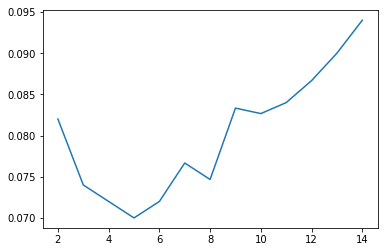

In [65]:
plt.plot(krange,errors) #affiche sous forme graphique, le nombre d'erreur par classifier (selon les voisins)
plt.show

In [66]:
#Le classifier est performant avec un Knn(3;4)... si on augmente la valeur de num_samples le résultat peut varier

#On va chercher à visualiser les erreurs

In [67]:
knn = KNeighborsClassifier(5) #NB de voisin = 3 

In [68]:
knn.fit(Xtrain,Ytrain) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
predict = knn.predict(Xtest) #annotation predict


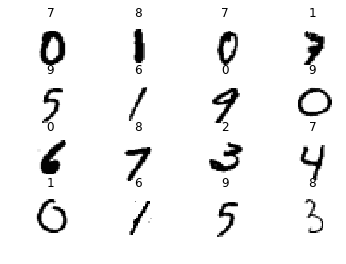

In [73]:
predict_viz = Xtest.reshape((-1,28,28)) #on utilise les images test
misclassified = Xtest[Ytest != predict] #on sélectionne dans predict les predictions différentes des annotations test
misclassified_label = predict [Ytest != predict] 
for index,val in enumerate (np.random.randint(predict.shape[0],size=16)):
    plt.subplot(4,4,index+1) 
    plt.axis('off') #axe
    plt.imshow(sample_viz[val],cmap=plt.cm.gray_r, interpolation="nearest") #visualisation
    plt.title ('%i' % predict[val])
    
plt.show()